In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv('Customertravel.csv')

# Display the first few rows
print(df.head(10))


   Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0   34            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   
5   27           Yes       High Income              1   
6   34            No     Middle Income              4   
7   34            No        Low Income              2   
8   30            No        Low Income              3   
9   36           Yes       High Income              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0  
5                         No        

In [3]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB
None


In [4]:
print(df.describe())

              Age  ServicesOpted      Target
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.000000
75%     35.000000       4.000000    0.000000
max     38.000000       6.000000    1.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64


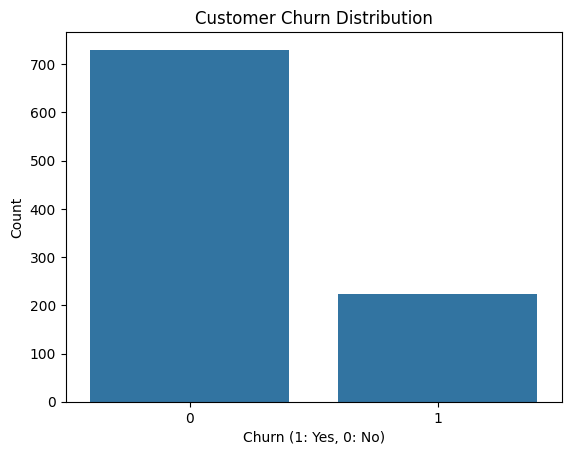

In [6]:
# Visualize the target variable distribution
sns.countplot(x='Target', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


In [7]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot'], drop_first=True)


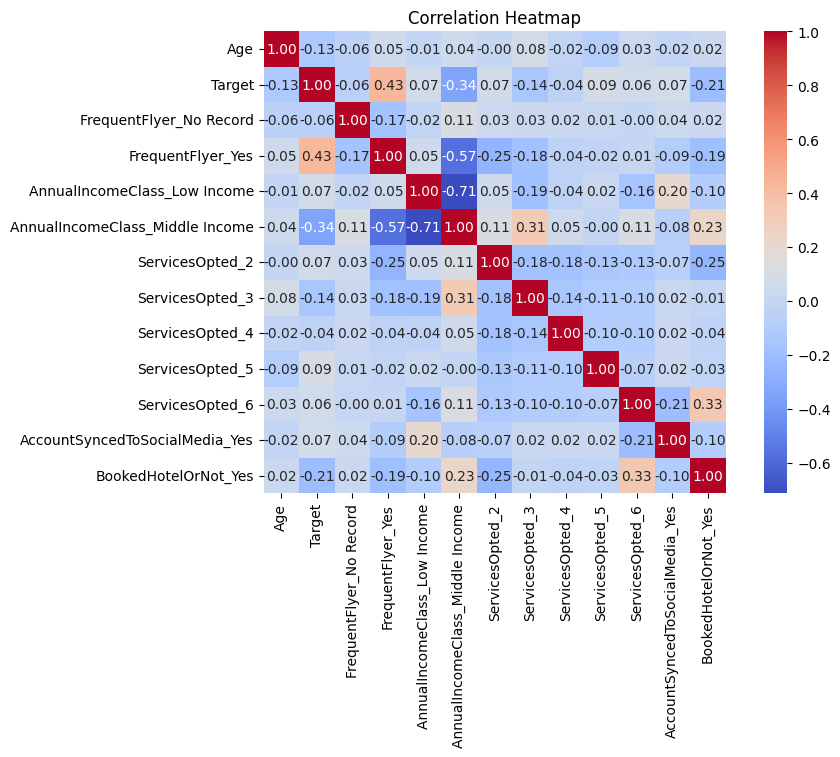

In [8]:
# Visualize correlations between features
plt.figure(figsize=(10, 6))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


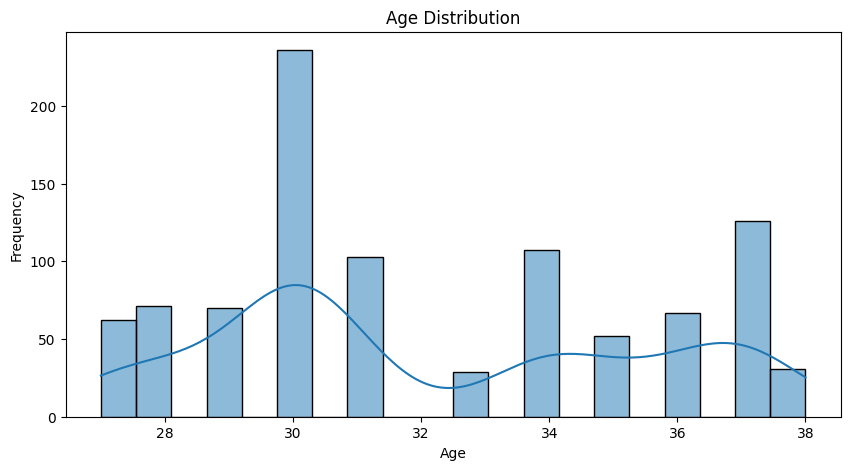

In [9]:
# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Define features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']


In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Identify categorical and numerical features
categorical_features = ['FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']
numerical_features = ['Age']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [13]:
# Create a pipeline with preprocessing and Random Forest Classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_pipeline.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       153
           1       0.79      0.61      0.69        38

    accuracy                           0.89       191
   macro avg       0.85      0.78      0.81       191
weighted avg       0.88      0.89      0.88       191

Confusion Matrix:
[[147   6]
 [ 15  23]]
Accuracy: 0.8900523560209425


In [14]:
# Create a pipeline with preprocessing and XGBoost Classifier
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])

# Train the XGBoost model
xgb_pipeline.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_pipeline.predict(X_test)

# Evaluate the model
print("XGBoost Classifier Results:")
print(classification_report(y_test, xgb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))
print("Accuracy:", accuracy_score(y_test, xgb_predictions))


XGBoost Classifier Results:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       153
           1       0.77      0.63      0.70        38

    accuracy                           0.89       191
   macro avg       0.84      0.79      0.81       191
weighted avg       0.88      0.89      0.89       191

Confusion Matrix:
[[146   7]
 [ 14  24]]
Accuracy: 0.8900523560209425


In [15]:
# Comparing the accuracies of both models
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")


Random Forest Accuracy: 0.89
XGBoost Accuracy: 0.89


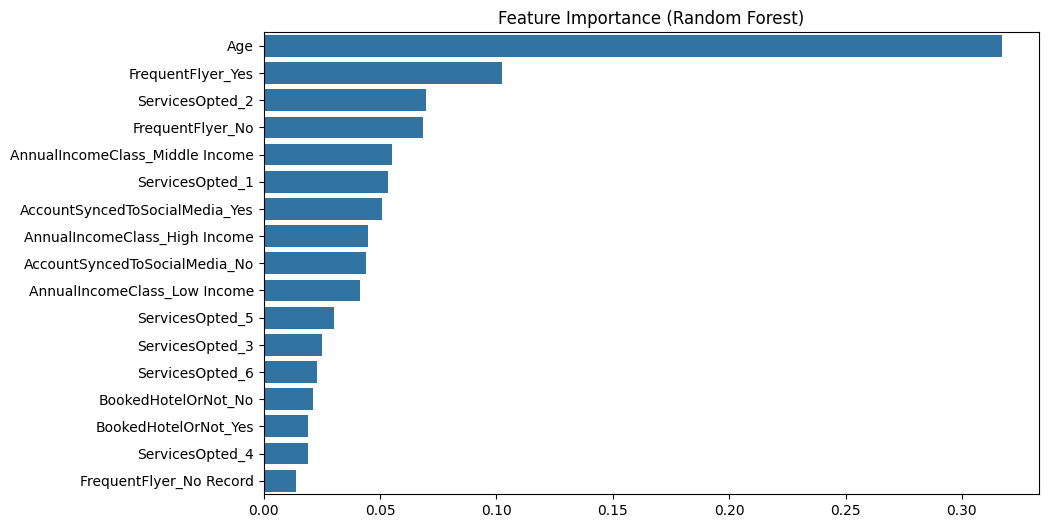

In [16]:
# Get feature importances from Random Forest
rf_importances = rf_pipeline.named_steps['classifier'].feature_importances_
features = np.concatenate((numerical_features, rf_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)))
sorted_indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances[sorted_indices], y=features[sorted_indices])
plt.title('Feature Importance (Random Forest)')
plt.show()


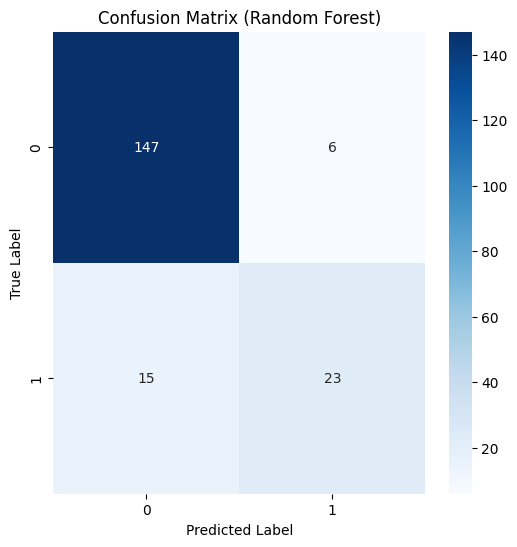

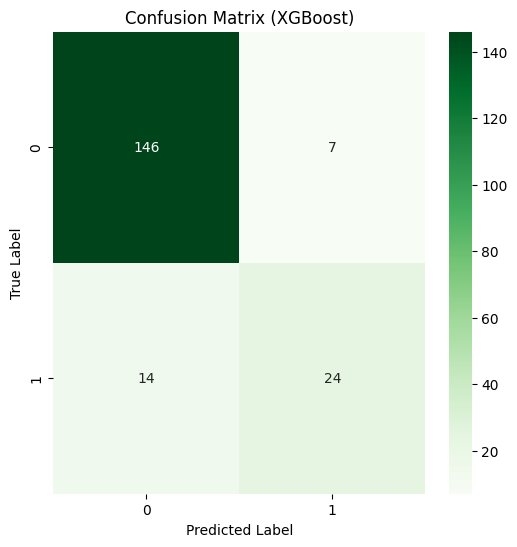

In [17]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for XGBoost
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


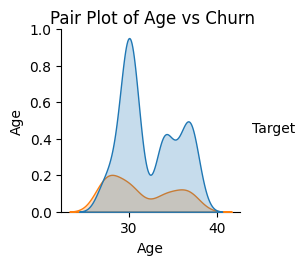

In [18]:
# Pair plot to visualize relationships between features
sns.pairplot(df, hue='Target', vars=['Age'], diag_kind='kde')
plt.suptitle('Pair Plot of Age vs Churn', y=1.02)
plt.show()


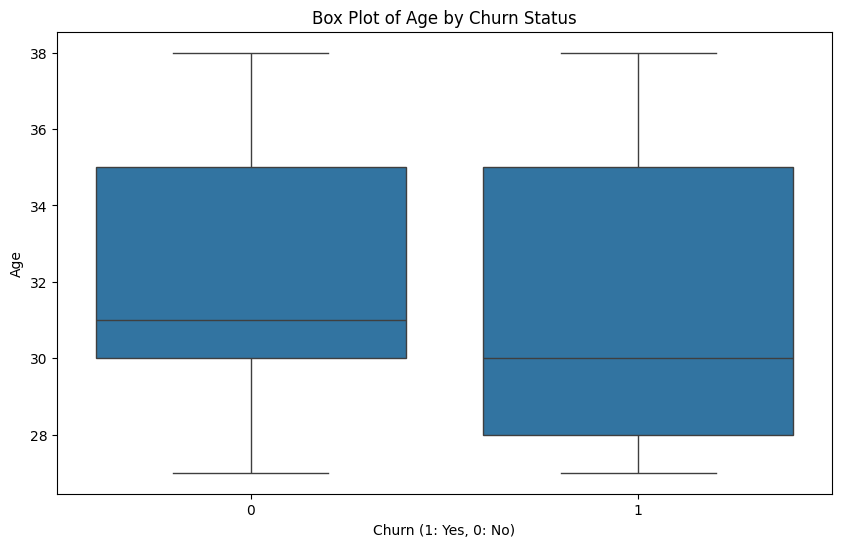

In [19]:
# Box plot for Age by Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.title('Box Plot of Age by Churn Status')
plt.xlabel('Churn (1: Yes, 0: No)')
plt.ylabel('Age')
plt.show()


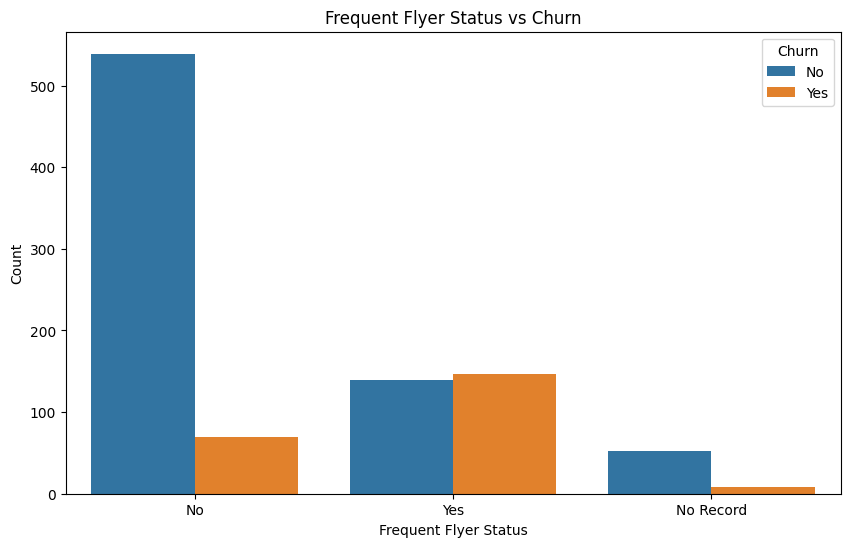

In [20]:
# Count plot for Frequent Flyer status
plt.figure(figsize=(10, 6))
sns.countplot(x='FrequentFlyer', hue='Target', data=df)
plt.title('Frequent Flyer Status vs Churn')
plt.xlabel('Frequent Flyer Status')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

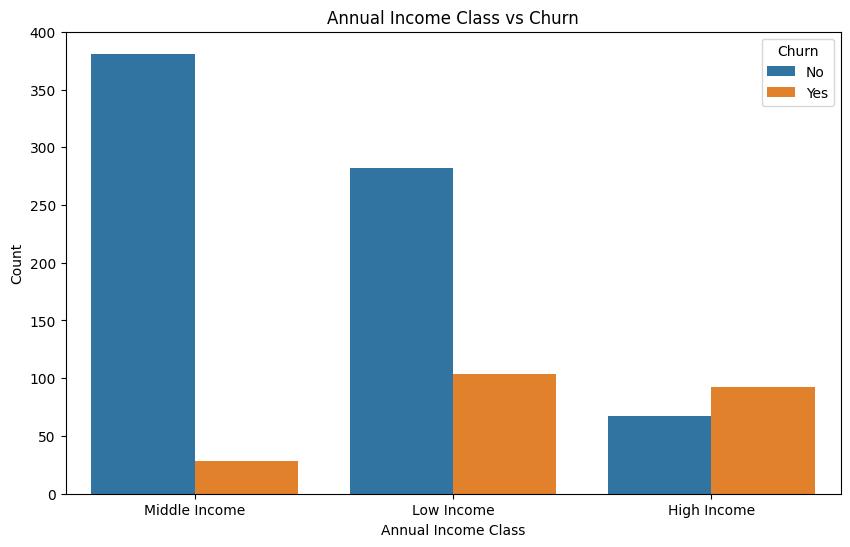

In [21]:
# Count plot for Annual Income Class
plt.figure(figsize=(10, 6))
sns.countplot(x='AnnualIncomeClass', hue='Target', data=df)
plt.title('Annual Income Class vs Churn')
plt.xlabel('Annual Income Class')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


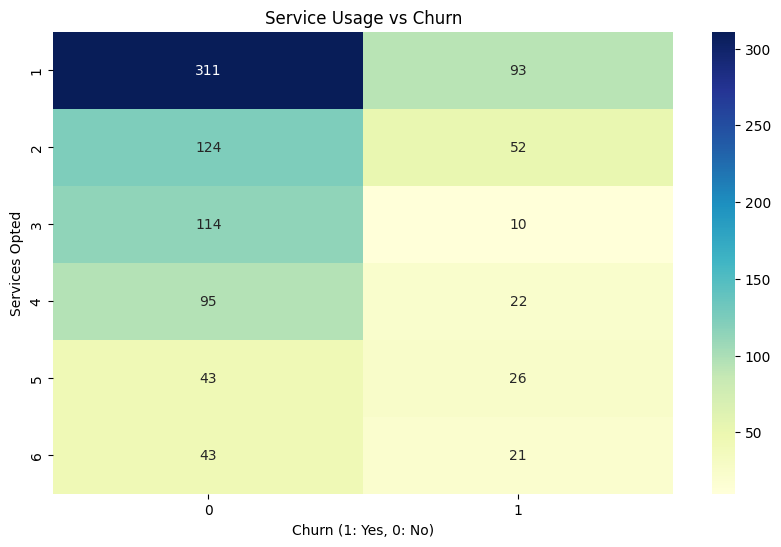

In [22]:
# Create a pivot table for service usage
service_usage = pd.crosstab(df['ServicesOpted'], df['Target'])
plt.figure(figsize=(10, 6))
sns.heatmap(service_usage, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Service Usage vs Churn')
plt.xlabel('Churn (1: Yes, 0: No)')
plt.ylabel('Services Opted')
plt.show()


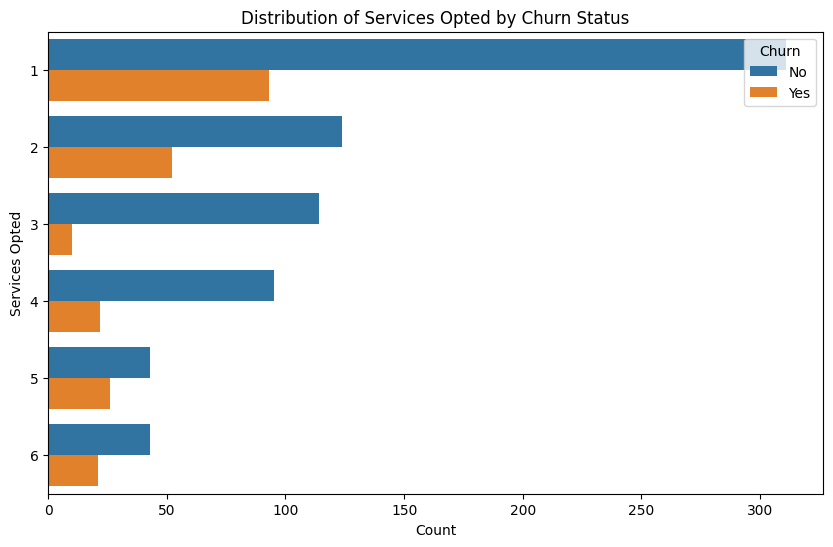

In [23]:
# Distribution of Services Opted by Target
plt.figure(figsize=(10, 6))
sns.countplot(y='ServicesOpted', hue='Target', data=df)
plt.title('Distribution of Services Opted by Churn Status')
plt.xlabel('Count')
plt.ylabel('Services Opted')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


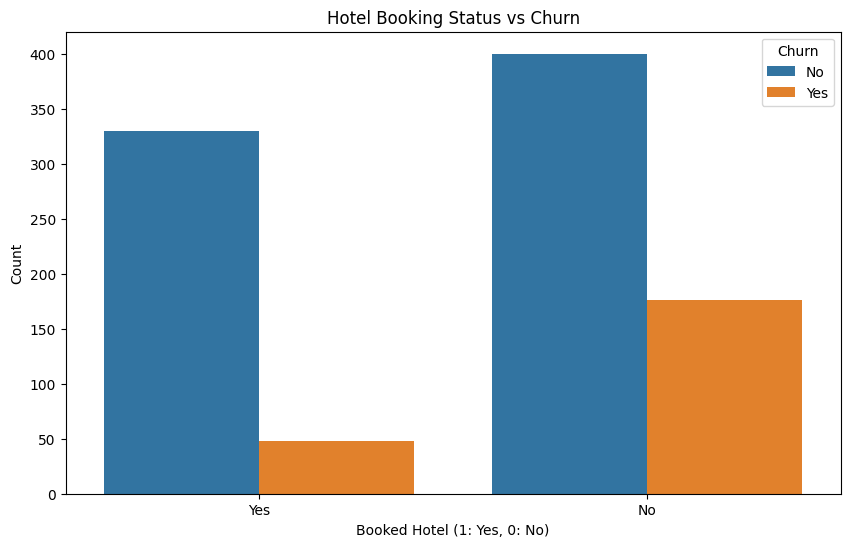

In [24]:
# Bar plot for Booked Hotel or Not
plt.figure(figsize=(10, 6))
sns.countplot(x='BookedHotelOrNot', hue='Target', data=df)
plt.title('Hotel Booking Status vs Churn')
plt.xlabel('Booked Hotel (1: Yes, 0: No)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


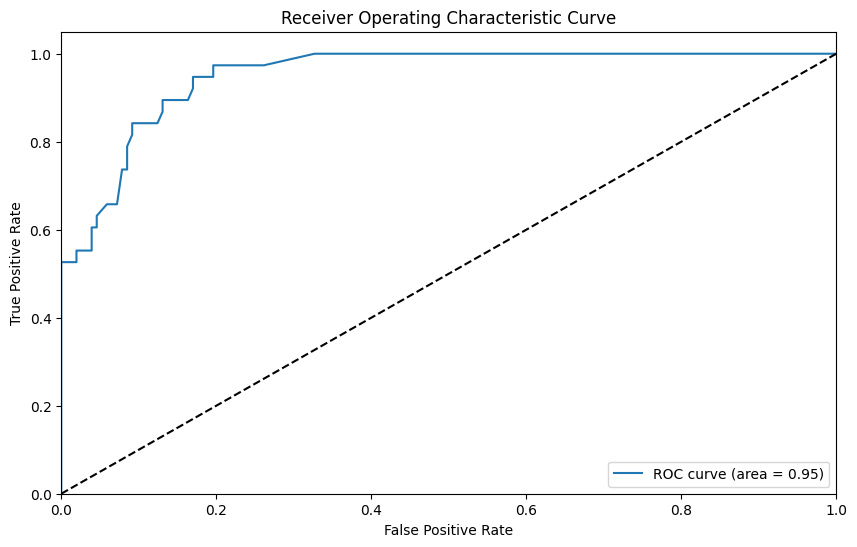

In [25]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    # Get probability estimates from the model
    y_scores = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curve for Random Forest
plot_roc_curve(rf_pipeline, X_test, y_test)


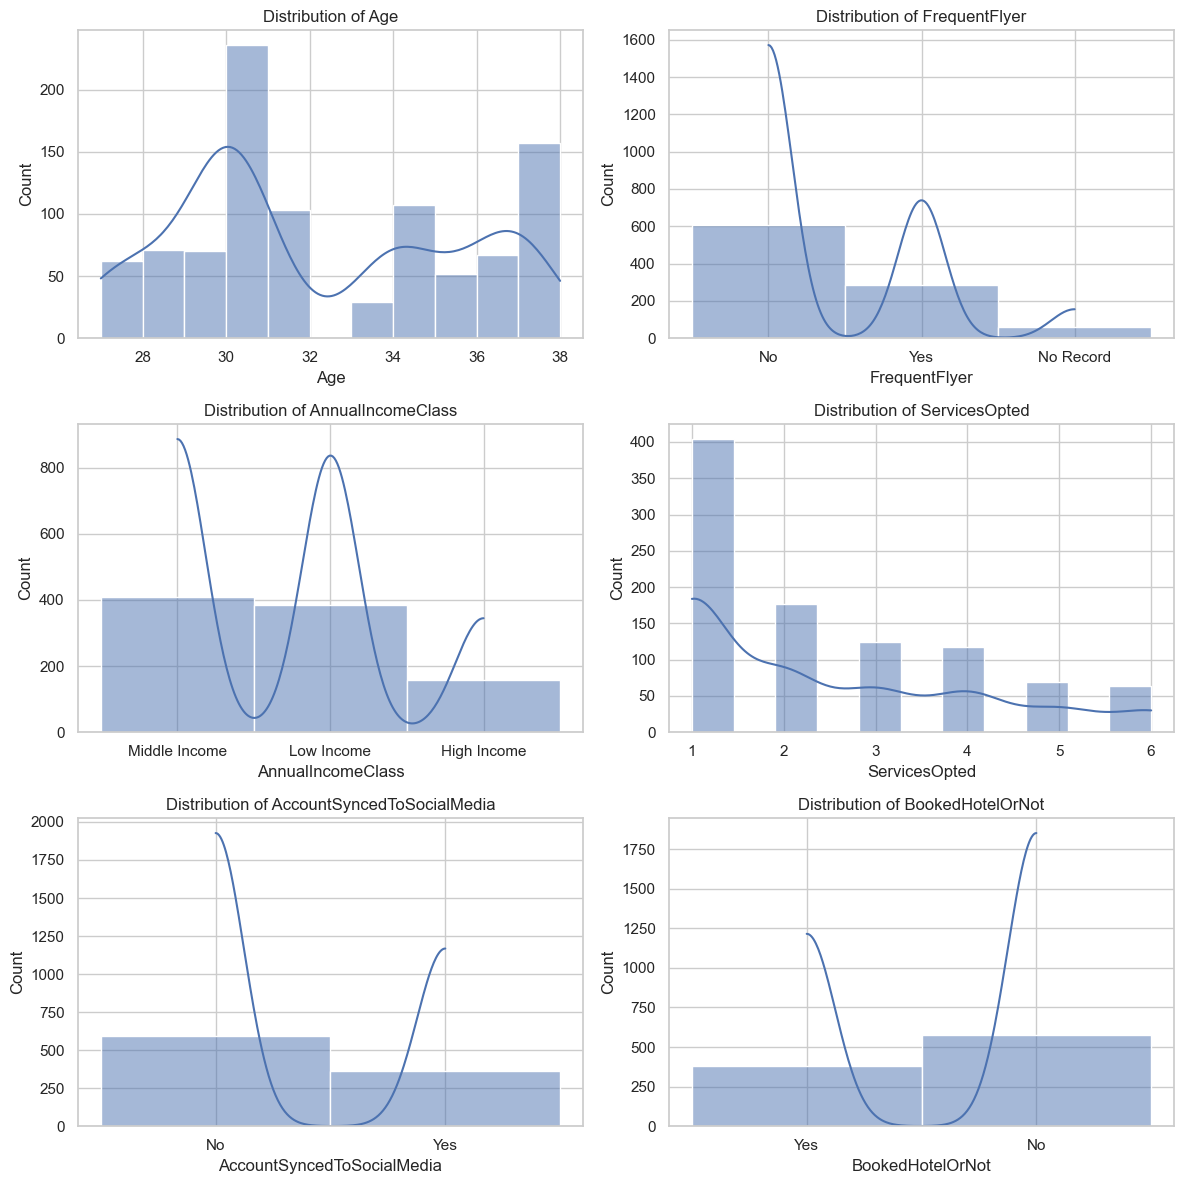

In [26]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create subplots for each feature
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plot distributions for each feature
for i, col in enumerate(X.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

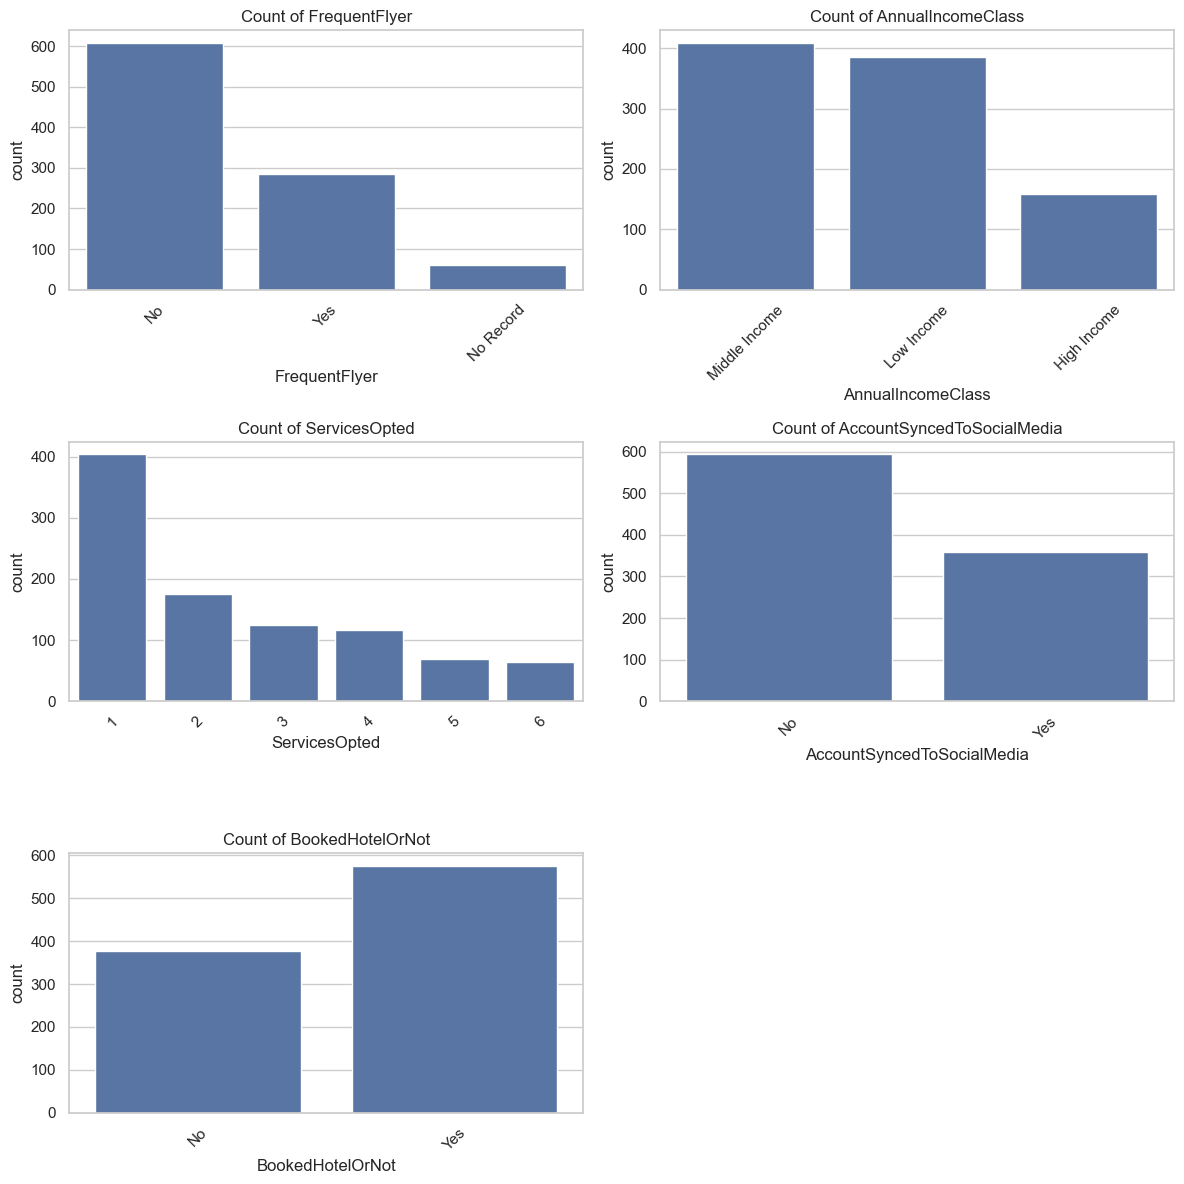

In [27]:
# Countplot for categorical features
num_categorical = len(categorical_features)
fig, axes = plt.subplots((num_categorical + 1) // 2, 2, figsize=(12, 12))  # Adjust number of rows based on features
axes = axes.flatten()

# Create countplots
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    
    # Set the x-ticks to avoid warnings
    axes[i].set_xticks(range(len(df[col].value_counts())))
    axes[i].set_xticklabels(df[col].value_counts().index, rotation=45)

# Hide any empty axes
for j in range(num_categorical, len(axes)):
    fig.delaxes(axes[j])  # Remove unused axes

plt.tight_layout()
plt.show()


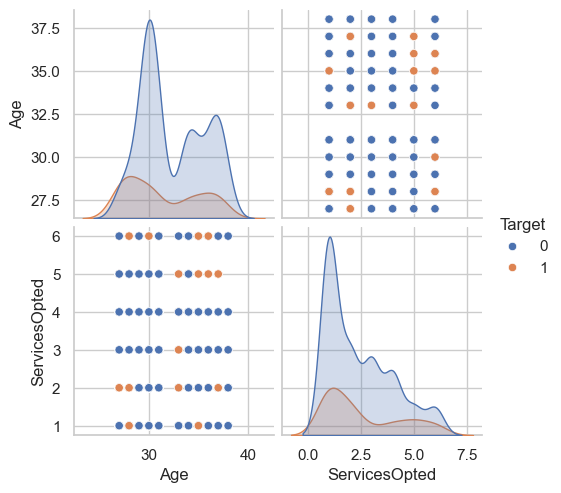

In [28]:
# Pairplot for visualizing relationships between features
sns.pairplot(df, hue='Target', diag_kind='kde')

plt.show()
